In [27]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [28]:
import numpy as np
import pandas as pd

In [29]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [30]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [31]:
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [32]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables

In [33]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [34]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [35]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

# Exploratory Climate Analysis

('2017-08-23',)
1 year ago:  2016-08-23
6.7


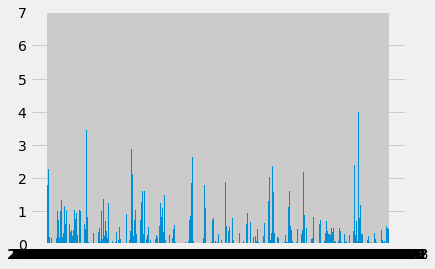

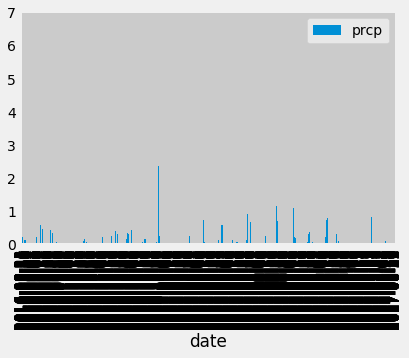

In [65]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

highest_date= session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(highest_date)
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("1 year ago: ", query_date)

percip_date=pd.read_sql("select date, prcp from Measurement", conn)
percip_date_filter=percip_date[(percip_date['date']>= '2016-08-23')]
print(percip_date_filter["prcp"].max())

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
percip_date_sort=percip_date_filter.sort_values("date", ascending=True)
percip_date_index=percip_date_sort.set_index("date")
percip_date_index

# Use Pandas Plotting with Matplotlib to plot the data
x_values=percip_date_sort['date']
y_values=percip_date_index['prcp']
plt.bar(x_values, y_values)
# plt.ylim(0,5)
# plt.show()
percip_date_index.plot(kind="bar")
#plt.bar(mice_per_drug.index.values, mice_per_drug.values)

In [67]:
# Use Pandas to calcualte the summary statistics for the precipitation data
#data = pd.read_sql("SELECT * FROM Census_Data", conn)
data=pd.read_sql("Select * from Measurement", conn)
percip=data["prcp"]
percip_mean=percip.mean()
percip_min=percip.min()
percip_max=percip.max()
print(f'The mean is {percip_mean}.')
print(f'The min is {percip_min}.')
print(f'The max is {percip_max}.')

The mean is 0.16064353974479206.
The min is 0.0.
The max is 11.53.


In [68]:
# Design a query to show how many stations are available in this dataset?
stations=data["station"].nunique()
stations

9

In [69]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_group=data.groupby(['station'])
count=station_group.count()
print("The most active station is USC00519281." )
count_sorted=count.sort_values("id", ascending=False)
count_sorted['id']

The most active station is USC00519281.


station
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: id, dtype: int64

In [70]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
highest_station=data[(data['station']=='USC00519281')]
highest_station
station_temp=highest_station['tobs']
highest_temp=station_temp.max()
avg_temp=station_temp.mean()
min_temp=station_temp.min()
print(f'The highest temp at station USC00519281 is {highest_temp}.')
print(f'The average temp at station USC00519281 is {avg_temp}.')
print(f'The lowest temp at station USC00519281 is {min_temp}.')

The highest temp at station USC00519281 is 85.0.
The average temp at station USC00519281 is 71.66378066378067.
The lowest temp at station USC00519281 is 54.0.


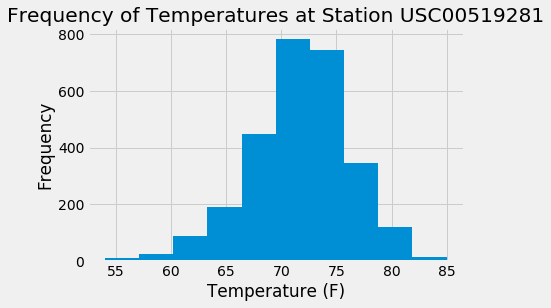

In [75]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temp.plot(kind='hist')
plt.xlabel("Temperature (F)")
plt.title("Frequency of Temperatures at Station USC00519281")
plt.savefig("output_data/temp_station.png")

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
